# 11. Brief Tour of the Standard Library — Part II

* 第二部分涵蓋更多支援專業程式設計所需要的進階模組。這些模組很少出現在小腳本中。

## 11.1. 輸出格式化 (Output Formatting)

* 當程式的輸出需要更具可讀性或特定格式時，可以使用以下模組。

1. **`reprlib` 模組 (簡潔的容器表示)**

* 主要用途：`reprlib` 模組提供了一個 `repr()` 的變體，專門用來以簡短的形式顯示大型或深層巢狀的容器（如 `list`, `set`, `dict`），避免因內容過多而佔滿整個螢幕。

基礎範例

In [ ]:
import reprlib

# 對一個包含很多元素的 set 使用 reprlib.repr()
reprlib.repr(set('supercalifragilisticexpialidocious'))
# "{'a', 'c', 'd', 'e', 'f', 'g', ...}" # 輸出被截斷並加上 ...

"{'a', 'c', 'd', 'e', 'f', 'g', ...}"

* `reprlib` 的更多常用函式與用法：

    * `reprlib` 的強大之處在於可以自訂截斷的規則。

In [ ]:
import reprlib

long_list = list(range(100))
deeply_nested_dict = {'a': 1, 'b': 2, 'c': {'d': 3, 'e': {'f': 4, 'g': 5}}}

# 1. 預設行為
print(f"預設 reprlib: {reprlib.repr(long_list)}")
# 輸出: 預設 reprlib: [0, 1, 2, 3, 4, 5, ...]

# 2. 自訂截斷規則
# 建立一個 Repr 物件來自訂行為
custom_repr = reprlib.Repr()

# (a) 設定 list 的最大長度
custom_repr.maxlist = 10
print(f"maxlist=10: {custom_repr.repr(long_list)}")
# 輸出: maxlist=10: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, ...]

# (b) 設定字串的最大長度
custom_repr.maxstring = 20
long_string = "This is a very long string that needs to be truncated."
print(f"maxstring=20: {custom_repr.repr(long_string)}")
# 輸出: maxstring=20: 'This is...uncated.'

# (c) 設定巢狀結構的最大深度
custom_repr.maxlevel = 2
print(f"maxlevel=2: {custom_repr.repr(deeply_nested_dict)}")
# 輸出: maxlevel=2: {'a': 1, 'b': 2, 'c': {'d': 3, 'e': {...}}}


預設 reprlib: [0, 1, 2, 3, 4, 5, ...]
maxlist=10: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, ...]
maxstring=20: 'This is...uncated.'
maxlevel=2: {'a': 1, 'b': 2, 'c': {'d': 3, 'e': {...}}}


2. **`pprint` 模組 (漂亮的印表機)**

* 主要用途：
    * `pprint` (Pretty-Printer) 模組能對內建和使用者自訂的物件提供更複雜的列印控制。
    
    * 當結果超過一行時，它會自動加入換行和縮排，以更清楚地顯示複雜的資料結構（特別是巢狀的字典和列表），這在除錯時非常有用。

基礎範例：

In [ ]:
import pprint

t = [[[['black', 'cyan'], 'white', ['green', 'red']], [['magenta', 'yellow'], 'blue']]]

# pprint 會根據寬度自動換行和縮排
pprint.pprint(t, width=30)

[[[['black', 'cyan'],
   'white',
   ['green', 'red']],
  [['magenta', 'yellow'],
   'blue']]]


In [ ]:
# pprint 的更多常用函式與用法:

import pprint

# 一個典型的 API 回應範例 (複雜的字典)
api_response = {
    'status': 'OK',
    'count': 2,
    'results': [
        {'id': 101, 'name': 'Alice', 'tags': ['Python', 'Data Science', 'AI']},
        {'id': 102, 'name': 'Bob', 'tags': ['Web', 'JavaScript', 'React', 'Node.js']}
    ]
}

# 1. 使用 indent 參數控制縮排寬度 (預設為 1)
print("--- indent=4 ---")
pprint.pprint(api_response, indent=4)

# 2. 使用 depth 參數控制顯示的巢狀深度
print("\n--- depth=2 ---")
pprint.pprint(api_response, depth=2) # 只顯示到第二層

# 3. 使用 sort_dicts 參數 (Python 3.8+) 將字典的鍵排序後再印出
# 這對於比較兩個字典或產生一致的輸出非常有用
print("\n--- sort_dicts=True ---")
pprint.pprint(api_response, sort_dicts=True)

# 4. pprint.pformat()：將美化後的輸出 "回傳為字串" 而非直接印出
# 這在您需要將格式化的字串存入日誌 (log) 或檔案時非常有用
print("\n--- pprint.pformat ---")
formatted_string = pprint.pformat(api_response, indent=2)
print(formatted_string)
#with open('api_log.txt', 'w', encoding='utf-8') as f:
#    f.write(formatted_string)

--- indent=4 ---
{   'count': 2,
    'results': [   {   'id': 101,
                       'name': 'Alice',
                       'tags': ['Python', 'Data Science', 'AI']},
                   {   'id': 102,
                       'name': 'Bob',
                       'tags': ['Web', 'JavaScript', 'React', 'Node.js']}],
    'status': 'OK'}

--- depth=2 ---
{'count': 2, 'results': [{...}, {...}], 'status': 'OK'}

--- sort_dicts=True ---
{'count': 2,
 'results': [{'id': 101,
              'name': 'Alice',
              'tags': ['Python', 'Data Science', 'AI']},
             {'id': 102,
              'name': 'Bob',
              'tags': ['Web', 'JavaScript', 'React', 'Node.js']}],
 'status': 'OK'}

--- pprint.pformat ---
{ 'count': 2,
  'results': [ { 'id': 101,
                 'name': 'Alice',
                 'tags': ['Python', 'Data Science', 'AI']},
               { 'id': 102,
                 'name': 'Bob',
                 'tags': ['Web', 'JavaScript', 'React', 'Node.js']}],
  'stat

3. **`textwrap` 模組 (文本段落格式化)**

* 主要用途：`textwrap` 模組能夠將長段落的純文字格式化，以符合指定的螢幕寬度，自動處理斷詞和換行。

基礎範例:

In [ ]:
import textwrap

doc = """The wrap() method is just like fill() except that it returns a list of strings instead of one big string with newlines to separate the wrapped lines."""

# .fill() 將長字串格式化為一個帶有換行符 (\n) 的新字串
print(textwrap.fill(doc, width=40))

The wrap() method is just like fill()
except that it returns a list of strings
instead of one big string with newlines
to separate the wrapped lines.


In [ ]:
# textwrap 的更多常用函式與用法：
import textwrap

# 1. textwrap.wrap()：與 fill() 類似，但回傳一個 "字串列表"
# 這讓你可以對每一行進行額外處理
print("--- 1 ---")
lines = textwrap.wrap(doc, width=40)
print(lines)
# 輸出: ['The wrap() method is just like fill()', 'except that it returns a list of strings', ...]

# 2. textwrap.shorten()：將文字截斷到指定長度，並加上預設的 [...]
print("--- 2 ---")
shortened_text = textwrap.shorten(doc, width=100, placeholder="... (更多)")
print(shortened_text)
# 輸出: The wrap() method is just like fill() except that it returns a list of strings instead... (更多)

# 3. textwrap.dedent()：移除文字區塊 "共同" 的前導空白
# 這在處理函式或類別中的多行字串時非常有用
print("--- 3 ---")
def show_help():
    # 這個字串在程式碼中有縮排，但我們希望輸出時是靠左對齊的
    help_text = """
    歡迎使用本系統！
    可用指令如下：
      - run: 執行主要任務
      - stop: 停止目前任務
    """
    print("--- 未處理的輸出 ---")
    print(help_text)

    print("--- 使用 dedent 處理後 ---")
    print(textwrap.dedent(help_text))

show_help()

--- 1 ---
['The wrap() method is just like fill()', 'except that it returns a list of strings', 'instead of one big string with newlines', 'to separate the wrapped lines.']
--- 2 ---
The wrap() method is just like fill() except that it returns a list of strings instead of... (更多)
--- 3 ---
--- 未處理的輸出 ---

    歡迎使用本系統！
    可用指令如下：
      - run: 執行主要任務
      - stop: 停止目前任務
    
--- 使用 dedent 處理後 ---

歡迎使用本系統！
可用指令如下：
  - run: 執行主要任務
  - stop: 停止目前任務



## 11.2 模板化 (Templating)

`string.Template` 是一個常被低估但非常實用的模組。當您需要處理的「模板」是來自使用者，或者格式非常簡單時，它比 `f-strings` 或 `.format()` 更安全、更簡單。

* `string` 模組包含一個多功能的 `Template` class，它提供了一種簡化的語法，特別適合讓終端使用者 (end-users) 進行編輯和客製化，而不需要變更應用程式的原始碼。

* 核心語法
    * 格式化方式是使用「佔位符號」(placeholder)，規則如下：

        * `$identifier`：標準的佔位符號 (例如 `$name`, `$cause`)。它由 `$` 加上一個合法的 Python 識別符（字母、數字和下底線）構成。

        * `${identifier}`：當佔位符號後面緊接著其他字母或數字時，必須使用大括號將其包覆，以避免混淆。

        * `$$`：這是一個跳脫字元 (escape sequence)，會被替換為單一個 `$` 符號。

1. **基礎用法：`substitute()`**

    * `substitute()` method 會執行替換。您可以透過「關鍵字引數」或「字典」來傳遞要替換的值。

範例:

In [ ]:
from string import Template

# --- 範例 1：使用關鍵字引數 ---
# ${village}folk 是一個很好的例子，展示了為何需要大括號
# $$10 則展示了跳脫
t1 = Template('${village}folk send $$10 to $cause.')

# 使用 .substitute() 搭配關鍵字引數
result1 = t1.substitute(village='Nottingham', cause='the ditch fund')
print(result1)

Nottinghamfolk send $10 to the ditch fund.


In [ ]:
# --- 範例 2：使用字典 ---
t2 = Template('Return the $item to $owner.')
data_dict = dict(item='unladen swallow', owner='Mr. Cleese')

# 使用 .substitute() 搭配字典 (使用 ** 運算子解包)
result2 = t2.substitute(**data_dict)
print(result2)

# 或者直接傳入字典
result3 = t2.substitute(data_dict)
print(result3)

Return the unladen swallow to Mr. Cleese.
Return the unladen swallow to Mr. Cleese.


2. **處理不完整的資料：`safe_substitute()`**

    * `substitute()` 的一個嚴格特性是：如果在字典或關鍵字引數中未提供某個佔位符號的值，它將引發 `KeyError`。

    * 對於「郵件合併」(mail-merge) 類型的應用程式，使用者提供的資料有可能是不完整的，此時使用 `safe_substitute()` method 會更適當——如果資料有缺少，它會保持佔位符號不變。

範例

In [ ]:
from string import Template

t = Template('Return the $item to $owner.')
d = dict(item='unladen swallow') # 故意缺少 'owner'

# 1. substitute() 會失敗
#t.substitute(d)
#Traceback (most recent call last):
#  ...
#KeyError: 'owner'

# 2. safe_substitute() 會保留缺少的佔位符號
t.safe_substitute(d)
#'Return the unladen swallow to $owner.'

'Return the unladen swallow to $owner.'

3. 更多實用的範例

* `string.Template` 非常適合用於使用者可設定的字串。

    * 範例 A：郵件合併 (Mail Merge)

    * 假設您允許使用者自訂一封電子報的歡迎詞。

In [ ]:
import string

# 模板由使用者在設定檔中定義
mail_template_str = """
Hi $name,

Welcome to $product! We are thrilled to have you.
As a special offer, please use this code: ${code}OFF
"""

mail_template = string.Template(mail_template_str)

# 使用者 1 (資料完整)
user1_data = {
    'name': 'Alice',
    'product': 'SuperApp',
    'code': 'WELCOME20'
}

# 使用者 2 (資料不完整，缺少 'code')
user2_data = {
    'name': 'Bob',
    'product': 'SuperApp'
}

# 替換使用者 1 (使用 substitute 沒問題)
print("--- User 1 Email ---")
print(mail_template.substitute(user1_data))

# 替換使用者 2 (必須使用 safe_substitute)
print("\n--- User 2 Email ---")
print(mail_template.safe_substitute(user2_data))

--- User 1 Email ---

Hi Alice,

Welcome to SuperApp! We are thrilled to have you.
As a special offer, please use this code: WELCOME20OFF


--- User 2 Email ---

Hi Bob,

Welcome to SuperApp! We are thrilled to have you.
As a special offer, please use this code: ${code}OFF



* 範例 B：動態 API 端點 (URL)

    * 假設您需要呼叫一個 API，但 API 的路徑和參數是動態的。

In [ ]:
import string

# 模板化 URL
api_url_template = string.Template(
    "https://api.example.com/v1/users?region=$region&status=$status"
)

# 查詢 1
params1 = {'region': 'APAC', 'status': 'active'}
print(api_url_template.substitute(params1))

# 查詢 2
params2 = {'region': 'EMEA', 'status': 'pending'}
print(api_url_template.substitute(params2))

https://api.example.com/v1/users?region=APAC&status=active
https://api.example.com/v1/users?region=EMEA&status=pending


`string.Template` vs. f-strings (為何要用它？)

* 您可能會想：「為什麼不直接用 f-strings 就好了？」 (例如 `f"{village}folk send $10 to {cause}"`)

* `string.Template` 的主要優勢在於**安全性**和**使用情境**：

1. **安全性 (最重要)**：如果「模板字串本身」是由終端使用者提供的，絕對不要使用 `.format()` 或 f-strings。惡意的使用者可以注入程式碼，導致您的應用程式出錯或洩漏敏感資料。`string.Template` 則沒有這個問題，它只會進行簡單的字典鍵查找，是安全的。

2. **簡單性**：`$` 語法對於非程式設計師 (例如，翻譯人員、系統管理員) 來說，比 f-strings 的 `{}` 語法更簡單、更直觀。

3. **可分離性**：如您內容所提，`string.Template` 允許您將「邏輯」與「格式」完全分離。您可以將模板儲存在獨立的 `.txt` 檔案中，讓使用者去修改它，而您的 Python 程式碼只需讀取該檔案並執行 `.substitute()` 即可。

## 11.3. 二進制資料記錄編排 (Binary Data Record Layouts)

PASS

## 11.4 多執行緒 (Multi-threading)

1. **基礎概念：什麼是多執行緒？**

一個餐廳的比喻。

* 情況 A：單執行緒 (Single-threading) - 一個服務生

    * 想像一家餐廳只有一個服務生（他就是您的程式）。 他的工作流程是循序 (sequentially) 的：

        1. 幫 A 桌點餐。

        2. 把菜單送到廚房。

        3. 【站在廚房門口，乾等 10 分鐘】 直到廚師（CPU/硬碟）做好菜。

        4. 把菜送給 A 桌。

        5. 然後，才能去 B 桌點餐。

    * 問題： 當服務生在「等待」廚房做菜時（這就是 I/O 綁定 (I/O-bound)，例如：等待檔案寫入、等待網路下載），他整個人被卡住了，B 桌和 C 桌的客人會非常不滿。

* 情況 B：多執行緒 (Multi-threading) - 兩個服務生

    * 現在餐廳有兩個服務生（兩個執行緒）：

        * 服務生 1 (主執行緒)：負責點餐和結帳。

        * 服務生 2 (工作執行緒)：負責送菜單和從廚房端菜。

    * 新的工作流程 (並行 Concurrency)：

        1. 服務生 1 幫 A 桌點餐，把菜單交給服務生 2。

        2. 同時發生：

            * 服務生 2 跑去廚房送菜單，並**【在那裡等待 10 分鐘】**。

            * 服務生 1 【不需等待】，立刻去 B 桌點餐。

        3. 服務生 1 幫 B 桌點完餐，交給服務生 2。

        4. 這時，A 桌的菜好了，服務生 2 馬上把菜送過去。

    * 好處： 餐廳的「反應能力」(Responsiveness) 大幅提升。客人（使用者）不會因為廚房（I/O）很慢，就覺得服務生（主程式）卡住了。

2. **Python 中的多執行緒 (`threading` 模組)**

* 執行緒 (Thread) 是一種用來對「非順序相依」的任務進行解耦 (decoupling) 的技術。

    * I/O 綁定 (I/O-bound) 的救星： 如比喻所示，它最大的用例是「運行 I/O 的同時，在另一個執行緒中進行計算」。

        * 等待網路下載

        * 讀取或寫入大型檔案 (就像範例中的 `zipfile`)

        * 等待資料庫回應

        * `time.sleep()`

    * CPU 綁定 (CPU-bound) 的限制 (GIL)：

        * 重要限制：在 CPython（最主流的 Python）中，有一個「全域直譯器鎖」(Global Interpreter Lock, GIL)。它確保在任何時刻，只有一個執行緒能真正執行 Python 程式碼。

        * 這就像餐廳雖然有 2 個服務生，但只有 1 支筆。他們必須快速輪流使用這支筆來寫單子。

        * 結論：如果您想做「純數學運算」（例如算 1 億次 Pi），開 2 個執行緒不會比較快。但如果您的任務是「等待」，多執行緒就非常有用了（因為服務生 2 在等廚房時，會把筆交還給服務生 1）。

---
Multi-threading 入門

* 使用 `time.sleep()` 來模擬一個需要「等待」的 I/O 任務（就像服務生在等廚房做菜）。

* 範例 1：**最基本的執行緒 (啟動與不等待)**
* 目標： 證明主程式（主執行緒）在啟動子執行緒後，不會等待它，而是會繼續做自己的事。

In [ ]:
import threading
import time

def background_task():
    """這是在 '背景' (子執行緒) 執行的函式"""
    print("  [子執行緒] 開始執行...")
    # 模擬一個耗時 3 秒的 I/O 任務 (例如下載檔案)
    time.sleep(3)
    print("  [子執行緒] 執行完畢。")

# --- 主程式 (主執行緒) ---
print("[主執行緒] 程式開始。")

# 1. 建立 Thread 物件
#    target=background_task 告訴執行緒：「你去執行 background_task 這個函式」
t = threading.Thread(target=background_task)

# 2. 啟動執行緒
#    .start() 會立刻返回，主程式會繼續往下跑
t.start()

# 3. 主程式繼續執行自己的工作
print("[主執行緒] 主程式正在做其他事情...")
time.sleep(1) # 主程式也忙了 1 秒
print("[主執行緒] 主程式執行完畢。")

#t.join() # 主程式等待子執行緒

# (請注意：主程式執行完畢後，程式會等到子執行緒也完畢才會真正結束)

[主執行緒] 程式開始。
  [子執行緒] 開始執行...
[主執行緒] 主程式正在做其他事情...
[主執行緒] 主程式執行完畢。


觀察： 「主程式執行完畢」這句話，比「子執行緒執行完畢」還要早出現！這證明了主程式沒有被 `time.sleep(3)` 卡住。

範例 2：**主程式等待子執行緒 (`.join()`)**

目標： 有時候，主程式需要確認子執行緒做完工作後，才能繼續執行（例如：下載完檔案後，主程式才能去讀取該檔案）。這時我們使用 `.join()`。

* `.join()` 的意思是：「在這裡停下來，直到 `t` 這個執行緒結束為止」。

In [ ]:
import threading
import time

def background_task():
    print("  [子執行緒] 開始執行...")
    time.sleep(3)
    print("  [子執行緒] 執行完畢。")

# --- 主程式 ---
print("[主執行緒] 程式開始。")

t = threading.Thread(target=background_task)
t.start()

print("[主執行緒] 主程式正在做其他事情...")
time.sleep(1)
print("[主執行緒] 主程式做完其他事情了。")

# 4. 等待！
print("[主執行緒] 呼叫 t.join()，等待子執行緒結束...")
t.join() # 主程式會 "卡" 在這一行，直到 background_task 完成

# 5. 子執行緒結束後，主程式才會繼續往下
print("[主執行緒] 子執行緒已結束，主程式現在才真正結束。")

[主執行緒] 程式開始。
  [子執行緒] 開始執行...
[主執行緒] 主程式正在做其他事情...
[主執行緒] 主程式做完其他事情了。
[主執行緒] 呼叫 t.join()，等待子執行緒結束...
  [子執行緒] 執行完畢。
[主執行緒] 子執行緒已結束，主程式現在才真正結束。


觀察： 這次「主程式真正結束」這句話，一定在「子執行緒執行完畢」之後才出現。

範例 3：**傳遞參數給執行緒 (`args`)**

目標： 讓子執行緒執行更靈活的任務。如果我們想讓它 `sleep(2)` 或 `sleep(5)` 怎麼辦？我們需要傳遞參數。

* 使用 `args` 參數，它必須是一個元組 (`tuple`)。

In [ ]:
import threading
import time

def task_with_args(task_name, duration):
    """一個接受參數的任務"""
    print(f"  [子執行緒 {task_name}] 開始，將執行 {duration} 秒...")
    time.sleep(duration)
    print(f"  [子執行緒 {task_name}] 執行完畢。")

# --- 主程式 ---
print("[主執行緒] 程式開始。")

# 1. 建立 Thread 物件，並傳遞 args
#    args=(...) 裡面的順序，必須對應到函式的參數順序
t = threading.Thread(target=task_with_args,
                     args=("任務A", 2)) # 傳遞 '任務A' 和 2
t.start()
t.join() # 等待它完成

print("[主執行緒] 任務A 完成。")

# --- (重要！) 如果只有一個參數 ---
# 必須寫成 args=( "唯一的參數", )
# 後面的逗號 , 絕對不能少！
t_single = threading.Thread(target=task_with_args, args=("任務B", 1))
t_single.start()
t_single.join()

print("[主執行緒] 任務B 完成。")

[主執行緒] 程式開始。
  [子執行緒 任務A] 開始，將執行 2 秒...
  [子執行緒 任務A] 執行完畢。
[主執行緒] 任務A 完成。
  [子執行緒 任務B] 開始，將執行 1 秒...
  [子執行緒 任務B] 執行完畢。
[主執行緒] 任務B 完成。


範例 4：**同時執行多個執行緒**

目標： 展示多執行緒的真正威力 —— 同時處理多個任務。

* 關鍵點：

    1. 分開「啟動迴圈」和「等待迴圈」。

    2. 您必須先啟動所有執行緒 (`.start()`)。

    3. 然後再一起等待所有執行緒 (`.join()`)。

（如果您在同一個迴圈裡 `start()` 又 `join()`，那程式就會又變回循序執行了！）

In [ ]:
import threading
import time

def task_with_args(task_name, duration):
    print(f"  [{task_name}] 開始，將執行 {duration} 秒...")
    time.sleep(duration)
    print(f"  [{task_name}] 執行完畢。")

# --- 主程式 ---
print("[主執行緒] 程式開始。")

tasks_to_run = [
    ("任務A", 3),
    ("任務B", 1),
    ("任務C", 2),
]

threads = [] # 用一個列表來存放所有執行緒

# --- 步驟 1：啟動 (Start) 迴圈 ---
print("[主執行緒] 正在啟動所有執行緒...")
for name, duration in tasks_to_run:
    t = threading.Thread(target=task_with_args, args=(name, duration))
    threads.append(t)
    t.start()
    # 注意：迴圈裡沒有 .join()！

# --- 步驟 2：等待 (Join) 迴圈 ---
print("[主執行緒] 所有執行緒已啟動，現在開始等待它們全部結束...")
for t in threads:
    t.join()

print("[主執行緒] 所有任務皆已完成！程式結束。")

[主執行緒] 程式開始。
[主執行緒] 正在啟動所有執行緒...
  [任務A] 開始，將執行 3 秒...
  [任務B] 開始，將執行 1 秒...
  [任務C] 開始，將執行 2 秒...
[主執行緒] 所有執行緒已啟動，現在開始等待它們全部結束...
  [任務B] 執行完畢。
  [任務C] 執行完畢。
  [任務A] 執行完畢。
[主執行緒] 所有任務皆已完成！程式結束。


觀察： 任務 B (1秒) 最先結束，任務 C (2秒) 其次，任務 A (3秒) 最後。總耗時約 3 秒（而不是 3+1+2 = 6 秒）。這就是多執行緒的威力！

範例 5：**使用「類別」(Class) 建立執行緒 (進階)**

當您的執行緒邏輯很複雜，需要自己的變數和函式時，使用類別來封裝會很有用。

目標： 將範例 3 改寫成類別形式。

In [ ]:
import threading
import time

# 1. 繼承 threading.Thread
class MyTask(threading.Thread):

    # 2. 用 __init__ 接收參數
    def __init__(self, task_name, duration):
        super().__init__() # (重要) 必須呼叫父類別的 __init__
        self.task_name = task_name
        self.duration = duration

    # 3. 執行緒要做的所有工作，都必須寫在 run() 這個函式裡
    def run(self):
        print(f"  [類別執行緒 {self.task_name}] 開始，將執行 {self.duration} 秒...")
        time.sleep(self.duration)
        print(f"  [類別執行緒 {self.task_name}] 執行完畢。")

# --- 主程式 ---
print("[主執行緒] 程式開始。")

# 4. 建立類別的 "實例 (instance)"
t1 = MyTask("任務X", 2)
t2 = MyTask("任務Y", 1)

# 5. 啟動 (它會自動去呼叫 run())
t1.start()
t2.start()

# 6. 等待
t1.join()
t2.join()

print("[主執行S緒] 程式結束。")

[主執行緒] 程式開始。
  [類別執行緒 任務X] 開始，將執行 2 秒...
  [類別執行緒 任務Y] 開始，將執行 1 秒...
  [類別執行緒 任務Y] 執行完畢。
  [類別執行緒 任務X] 執行完畢。
[主執行S緒] 程式結束。


---
比較正式的 Multi-threading 範例

方法 1：子類別化 `threading.Thread` (您提供的範例)

這是比較「物件導向」的作法，適合封裝較複雜的任務。

In [ ]:
import threading, zipfile
import time

# 1. 建立一個繼承自 threading.Thread 的類別
class AsyncZip(threading.Thread):
    # 2. (可選) 覆寫 __init__ 來接收參數
    def __init__(self, infile, outfile):
        threading.Thread.__init__(self) # 必須呼叫父類別的 __init__
        self.infile = infile
        self.outfile = outfile

    # 3. 覆寫 run() 方法：這是新執行緒 "真正" 要做的工作
    def run(self):
        print(f"  [Thread {self.name}] 開始壓縮 {self.infile}...")
        f = zipfile.ZipFile(self.outfile, 'w', zipfile.ZIP_DEFLATED)
        f.write(self.infile)
        # 故意讓它慢一點，模擬大檔案
        time.sleep(2)
        f.close()
        print(f"  [Thread {self.name}] 完成背景壓縮。")

# --- 主程式 (主執行緒) ---
print("[Main Thread] 程式開始。")
print("[Main Thread] 準備建立 'mydata.txt'...")
with open('mydata.txt', 'w') as f:
    f.write("This is my data" * 10000)

print("[Main Thread] 檔案準備完畢。")

# 4. 建立執行緒物件
background = AsyncZip('mydata.txt', 'myarchive.zip')

# 5. .start()：啟動新執行緒 (它會自動去呼叫 run())
# (!!!) 永遠不要自己呼叫 .run()，否則它會卡在主執行緒
background.start()

print("[Main Thread] 主程式繼續在前景執行 (不用等壓縮)...")
time.sleep(0.5) # 主程式做點別的事
print("[Main Thread] 主程式做完其他事了。")

# 6. .join()：主程式 "暫停" 在這裡，"等待" background 執行緒完成
background.join()

print("[Main Thread] 主程式確認背景任務已完成，現在才真正結束。")

方法 2：使用 `target` 參數 (更簡單、更常用)

如果您只是想讓一個「函式」在背景執行，不需要建立一個完整的類別。

新範例：背景下載器

In [ ]:
import threading
import time

def download_file(filename, url):
    """一個模擬下載的函式"""
    print(f"  [Thread {threading.current_thread().name}] 開始下載 {filename}...")
    # 模擬 I/O 等待
    time.sleep(3)
    print(f"  [Thread {threading.current_thread().name}] 下載 {filename} 完成。")

print("[Main Thread] 程式開始。")

# 1. 建立 Thread 物件
#    target=：指定要在新執行緒中執行的 "函式"
#    args=：以 tuple 形式傳遞給 target 函式的參數
t = threading.Thread(target=download_file,
                     args=('report.pdf', 'http://example.com/report'),
                     name="Downloader") # (可選) 幫執行緒取個名字

# 2. 啟動
t.start()

print("[Main Thread] 主程式不用等待下載，繼續執行...")
print("[Main Thread] 主程式執行完畢。")

# 如果主程式在這裡就結束了，背景執行緒可能會被強行終止
# 所以我們通常還是會 .join() 來確保子執行緒完成
t.join()
print("[Main Thread] 確認下載執行緒已結束。")

[Main Thread] 程式開始。
  [Thread Downloader] 開始下載 report.pdf...
[Main Thread] 主程式不用等待下載，繼續執行...
[Main Thread] 主程式執行完畢。
  [Thread Downloader] 下載 report.pdf 完成。
[Main Thread] 確認下載執行緒已結束。


**最大的挑戰：協調執行緒 (`queue` 模組)**

* 最大的挑戰是協調「共享資料」的執行緒。

* 糟糕的範例 (競速條件 **Race Condition**)： 想像兩個執行緒同時 `global_counter += 1`。

    1. Thread A 讀取 `counter` (值=5)

    2. Thread B 讀取 `counter` (值=5)

    3. Thread A 計算 5 + 1 = 6

    4. Thread B 計算 5 + 1 = 6

    5. Thread A 寫入 6

    6. Thread B 寫入 6 結果 `counter` 是 6，但我們預期是 7。這就是「競速條件」。

* 雖然 `threading` 模組提供了 `threading.Lock()` (鎖) 這種工具來解決，但很容易出錯 (例如忘記釋放鎖，造成死鎖)。

**最佳實踐：使用 `queue` 模組**

* 任務協調的首選方法是：**不要讓執行緒共享資料**。 而是使用 `queue` 模組（它是執行緒安全的）作為「任務輸送帶」。

    * 主執行緒 (生產者)：把任務（資料）放進 `queue`。

    * 工作執行緒 (消費者)：從 `queue` 拿任務來執行。

範例：一個安全的「生產者-消費者」模型

這個 `queue` 模型更易於設計、更易讀、更可靠。

In [ ]:
import threading
import queue
import time

# 1. 建立一個 "執行緒安全" 的佇列 (Queue)
task_queue = queue.Queue()

def worker():
    """這就是我們的工作執行緒要執行的函式"""
    thread_name = threading.current_thread().name
    print(f"  [{thread_name}] 已啟動，等待任務...")

    while True:
        # 2. .get() 會 "自動" 阻塞 (等待)，直到佇列中有東西
        try:
            # 我們用 timeout 來讓它可以被主程式的 'None' 訊號關閉
            task_data = task_queue.get(timeout=1)
        except queue.Empty:
            continue # 如果 1 秒都沒任務，就繼續等

        # 3. 收到 "毒丸 (Poison Pill)" 訊號，結束迴圈
        if task_data is None:
            print(f"  [{thread_name}] 收到結束訊號，即將關閉。")
            break

        # 4. 執行任務
        print(f"  [{thread_name}] 正在處理任務: {task_data}")
        time.sleep(0.5) # 模擬工作

        # 5. (可選) 通知佇列，這個任務已經完成了
        task_queue.task_done()

# --- 主程式 (生產者) ---
print("[Main Thread] 建立 3 個工作執行緒...")
num_workers = 3
workers = []
for i in range(num_workers):
    t = threading.Thread(target=worker, name=f"Worker-{i}")
    t.start()
    workers.append(t)

# 6. 把任務 "放進" 佇列
print("[Main Thread] 派發 10 個任務...")
for i in range(10):
    task_queue.put(f"任務編號 {i}")
    time.sleep(0.1) # 模擬任務派發

# 7. .join() 佇列：等待 "所有" 被 .put() 的任務都被 .task_done()
print("[Main Thread] 等待所有任務被處理完畢...")
task_queue.join()

print("[Main Thread] 所有任務皆已完成。")

# 8. 傳送 "毒丸" 來關閉所有工作執行緒
print("[Main Thread] 傳送 'None' 訊號以關閉所有 workers...")
for _ in range(num_workers):
    task_queue.put(None)

# 9. 等待所有執行緒都確實關閉
for t in workers:
    t.join()

print("[Main Thread] 所有執行緒皆已關閉。程式結束。")

[Main Thread] 建立 3 個工作執行緒...
  [Worker-0] 已啟動，等待任務...
  [Worker-1] 已啟動，等待任務...
  [Worker-2] 已啟動，等待任務...
[Main Thread] 派發 10 個任務...
  [Worker-0] 正在處理任務: 任務編號 0
  [Worker-1] 正在處理任務: 任務編號 1
  [Worker-2] 正在處理任務: 任務編號 2
  [Worker-0] 正在處理任務: 任務編號 3
  [Worker-1] 正在處理任務: 任務編號 4
  [Worker-2] 正在處理任務: 任務編號 5
  [Worker-0] 正在處理任務: 任務編號 6
[Main Thread] 等待所有任務被處理完畢...
  [Worker-1] 正在處理任務: 任務編號 7
  [Worker-2] 正在處理任務: 任務編號 8
  [Worker-0] 正在處理任務: 任務編號 9
[Main Thread] 所有任務皆已完成。
[Main Thread] 傳送 'None' 訊號以關閉所有 workers...
  [Worker-2] 收到結束訊號，即將關閉。
  [Worker-0] 收到結束訊號，即將關閉。
  [Worker-1] 收到結束訊號，即將關閉。
[Main Thread] 所有執行緒皆已關閉。程式結束。


## 非同步I/O (asyncio)



Multi-threading 與 async io 的差別:

* 這兩者是 Python 中實現「並行 (Concurrency)」的兩種不同方式，它們的核心差異非常大：

1. **執行緒數量**：

    * **Multi-threading (多執行緒)**：使用**多個作業系統執行緒 (Thread)**。作業系統 (OS) 會強制在這些執行緒之間「切換」執行權，這稱為「先佔式多工 (Preemptive Multitasking)」。

    * **Asyncio (非同步 I/O)**：**只使用一個執行緒 (Single Thread)**。它在一個「事件迴圈 (Event Loop)」中執行，程式碼必須**主動**使用 `await` 關鍵字來「暫停」自己，好讓迴圈去執行其他任務，這稱為「協同式多工 (Cooperative Multitasking)」。

2. **切換時機**：

    * **Multi-threading**：切換時機**由作業系統決定**，您的程式碼無法精確控制。

    * **Asyncio**：切換時機**由您的程式碼決定**（在您寫 `await` 的地方）。

3. **主要用途**：

    * 兩者都主要用於 **I/O 綁定 (I/O-bound)** 的任務（如網路請求、檔案讀寫）。

    * **Asyncio**：特別擅長處理**極大量 (數千到數萬個)** 的**同時 I/O 連線**（例如聊天室伺服器、網路爬蟲），因為建立執行緒的成本很高，而 `asyncio` 的任務 (Task) 成本極低。

    * **Multi-threading**：適用於 I/O 任務數量**可控 (例如 10-100 個)**，或者當您需要與**不支持 `asyncio` 的舊版程式碼**整合時。

4. **主要挑戰**：

    * **Multi-threading**：最大的挑戰是「競速條件 (Race Conditions)」和「死鎖 (Deadlocks)」。您需要使用「鎖 (Locks)」來保護共享資料，這非常容易出錯。

    * **Asyncio**：因為在單一執行緒中，您**永遠不需要擔心鎖**（在 `await` 之外）。最大的挑戰是您必須使用 `async`/`await` 語法，且您呼叫的所有 I/O 函式庫都**必須**支援 `asyncio`（例如 `requests` 要換成 `aiohttp`）。

一句話總結：

* Multi-threading 像是找多個服務生（執行緒），由經理（OS）來隨時調度他們。

* Asyncio 像是只有一個超人服務生（單執行緒），他有能力在「等待廚房」的空檔，主動 (`await`) 跑去幫下一桌點餐。

---
**`asyncio` 教學**

1. **核心概念：`asyncio` 是什麼？**

* 回想一下我們的餐廳比喻：

    * 多執行緒 (Multi-threading)：是找多個服務生（多個執行緒）。他們同時都在工作，但經理（作業系統）會隨時拍他們的肩膀，強制他們切換任務。

    * Asyncio (非同步)：是只找一個「超人服務生」（單一執行緒）。

* 這位「超人服務生」的工作模式是：

    1. 他跑到 A 桌點餐。

    2. 他把菜單送進廚房。廚師說：「這道菜要等 10 分鐘（I/O 等待）。」

    3. 關鍵點： 這位超人服務生不會傻傻地在廚房門口等 10 分鐘。

    4. 他會主動在小本本上註記：「A 桌的菜，10 分鐘後回來拿」，然後立刻跑去 B 桌點餐。

    5. 他幫 B 桌點完餐，送到廚房，廚師說：「這要 5 分鐘。」

    6. 他又在小本本上註記，立刻跑去 C 桌倒水。

    7. 他會不斷地在「A 桌取餐」、「B 桌取餐」、「C 桌倒水」這些已經準備好的任務之間切換。

* 這就是 `asyncio`：**在單一執行緒上，透過「主動讓出控制權」來實現並行 (Concurrency) 的一種方式**。

2. **`asyncio` 的三個核心關鍵字**

您必須先認識這三個新夥伴：

1. `async def` (定義一個「協程 Coroutine」)

    * `def` 用來定義一個普通函式。

    * `async def` 用來定義一個「可暫停的」函式。

    * 您可以把它想像成：這是一個「未來才能完成的承諾 (Promise)」。單獨呼叫它，它什麼也不會做，只會回傳一個「協程物件」。

2. `await` (「暫停」並「等待」)

    * `await` 只能用在 `async def` 函式內部。

    * 這就是「超人服務生」主動讓出控制權的動作。

    * 當程式碼執行到 `await` 一個耗時的 I/O 操作（例如 `await asyncio.sleep(10)` 或 `await network_request()`），它會說：

        * 「OK，這個任務（例如等廚房 10 分鐘）我已經交代下去了。我（主執行緒）先去忙別的，等這個任務完成了再來叫我。」

3. `asyncio.run( main() )` (事件迴圈 Event Loop)

    * 如果 `async def` 是「承諾」，`await` 是「暫停點」，那麼事件迴圈 (Event Loop) 就是那個**「超人服務生的大腦」或「總調度中心」**。

    * 它會執行您交給它的第一個任務（例如 `main()`）。

    * 當任務 `await` 時，它就把這個任務暫停，然後去執行「小本本」上其他已經準備好的任務。

    * `asyncio.run()` 是啟動這一切的起點。

範例 1：最基本的 `asyncio` 程式 (Hello World)

目標： 學習如何定義並執行一個 `async` 函式。

In [ ]:
import asyncio
import time

# 1. 使用 'async def' 定義一個 "協程函式"
async def main():
    print(f"[{time.strftime('%X')}] Hello...")

    # 2. 模擬一個耗時 1 秒的 I/O 任務
    #    (注意！我們用 'await asyncio.sleep()' 而非 'time.sleep()')
    await asyncio.sleep(1)

    print(f"[{time.strftime('%X')}] ...World!")

# 3. 直接呼叫 main() 是沒有用的：
# >>> main()
# <coroutine object main at 0x...>  (它只會回傳一個協程物件)

# 4. 必須使用 asyncio.run() 來啟動 "事件迴圈" 並執行它
print(f"[{time.strftime('%X')}] 準備執行 main...")
asyncio.run(main())
print(f"[{time.strftime('%X')}] main 執行完畢。")

[15:35:47] 準備執行 main...


RuntimeError: asyncio.run() cannot be called from a running event loop

這是一個在 Colab 或 Jupyter Notebook 中非常常見的錯誤！

您的程式碼本身是完全正確的，如果將它儲存為一個 `.py` 檔案並從終端機執行，它會完美運作。

錯誤原因 (Why?)

這個錯誤的原因很簡單：Google Colab（以及 Jupyter Notebook）為了方便使用者，已經在背景為您啟動了一個 `asyncio` 事件迴圈 (Event Loop)。

`asyncio.run()` 函式的功能是：

1. 建立一個全新的事件迴圈。

2. 執行您傳給它的任務（`main()`）。

3. 關閉該迴圈。

因此，當您在 Colab 中呼叫 `asyncio.run()` 時，它試圖建立一個「新」的迴圈，但偵測到「已經有一個迴圈正在執行中」，於是它為了避免衝突，就立刻拋出了 `RuntimeError`。

如何處理 (How?)

解決方案：(最簡單且推薦) 直接 `await` 您的函式

既然 Colab 已經有了一個正在執行的迴圈，您不需要再啟動一個新的。您只需要把您的「協程 (coroutine)」提交給那個已經在執行的迴圈即可。

在 Colab/Jupyter 中，最簡單的方法就是直接在函式呼叫前加上 `await`。

In [ ]:
import asyncio
import time

# 1. 使用 'async def' 定義一個 "協程函式"
async def main():
    print(f"[{time.strftime('%X')}] Hello...")

    # 2. 模擬一個耗時 1 秒的 I/O 任務
    await asyncio.sleep(1)

    print(f"[{time.strftime('%X')}] ...World!")

In [ ]:
# 4. 必須使用 "await" 來啟動協程 (因為 Colab 已有事件迴圈)
print(f"[{time.strftime('%X')}] 準備執行 main...")
await main()
print(f"[{time.strftime('%X')}] main 執行完畢。")

[15:40:51] 準備執行 main...
[15:40:51] Hello...
[15:40:52] ...World!
[15:40:52] main 執行完畢。


觀察： `await asyncio.sleep(1)` 確實暫停了 `main()` 函式 1 秒鐘，但它並沒有卡住整個程式，而是把控制權交還給了事件迴圈（雖然這個迴圈目前也沒別的事做）。

範例 2：`asyncio` 的真正威力 (同時執行多個任務)

* 目標： 證明 `asyncio` 可以「同時」處理多個 I/O 任務，而不是一個接一個。

* 關鍵函式：`asyncio.gather()`

    * `asyncio.gather( task1, task2, ... )` 就像是告訴服務生：「這裡有 3 張菜單，你全部送進廚房，然後等到它們全部都做好再回來。」

A. 錯誤的 (循序) 方式：

In [ ]:
import asyncio
import time

async def say_after(delay, what):
    await asyncio.sleep(delay)
    print(f"[{time.strftime('%X')}] {what}")

async def main_sequential():
    print(f"[{time.strftime('%X')}] --- 循序執行開始 ---")
    start_time = time.time()

    # 這裡會：
    # 1. 等待 2 秒
    # 2. 印出 'hello'
    # 3. "然後才" 開始等待 1 秒
    # 4. 印出 'world'
    await say_after(2, 'hello')
    await say_after(1, 'world')

    end_time = time.time()
    print(f"[{time.strftime('%X')}] --- 循序執行結束 (耗時 {end_time - start_time:.2f} 秒) ---")

#asyncio.run(main_sequential())
await main_sequential()

[15:44:58] --- 循序執行開始 ---
[15:45:00] hello
[15:45:01] world
[15:45:01] --- 循序執行結束 (耗時 3.00 秒) ---


觀察： 總共花了 3 秒。這不是我們要的！

B. 正確的 (並行) 方式：使用 `asyncio.gather()`

In [ ]:
import asyncio
import time

async def say_after(delay, what):
    await asyncio.sleep(delay)
    print(f"[{time.strftime('%X')}] {what}")

async def main_concurrent():
    print(f"[{time.strftime('%X')}] --- 並行執行開始 ---")
    start_time = time.time()

    # asyncio.gather() 會 "同時" 啟動這兩個任務
    # 服務生把 2 張菜單 "同時" 丟進廚房
    await asyncio.gather(
        say_after(2, 'hello (2秒任務)'),
        say_after(1, 'world (1秒任務)')
    )

    end_time = time.time()
    print(f"[{time.strftime('%X')}] --- 並行執行結束 (耗時 {end_time - start_time:.2f} 秒) ---")

#asyncio.run(main_concurrent())
await main_concurrent()

[15:47:33] --- 並行執行開始 ---
[15:47:34] world (1秒任務)
[15:47:35] hello (2秒任務)
[15:47:35] --- 並行執行結束 (耗時 2.00 秒) ---


觀察： 總耗時只有 2 秒（即最長的那個任務所花的時間）！這證明了兩個 `sleep` 是同時開始的。

範例 3：`asyncio` 的最大陷阱 (Blocking Call)

目標： 了解為什麼 `asyncio` 絕對不能與「傳統的、會阻塞的」函式混用（例如 `time.sleep()` 或 `requests.get()`）。

* 記住，我們的服務生只有一個。如果他被「卡住」，整個餐廳（事件迴圈）就停擺了。

    * `await asyncio.sleep(5)`：服務生主動讓出控制權（「我去忙別的」）。

    * `time.sleep(5)`：服務生原地罰站 5 秒鐘（「卡住了」）。

In [ ]:
import asyncio
import time

async def task_asyncio():
    """非阻塞任務 (好)"""
    print(f"  [{time.strftime('%X')}] 任務A (asyncio.sleep) 開始...")
    await asyncio.sleep(2)
    print(f"  [{time.strftime('%X')}] 任務A (asyncio.sleep) 結束。")

async def task_blocking():
    """阻塞任務 (壞!)"""
    print(f"  [{time.strftime('%X')}] 任務B (time.sleep) 開始... (糟糕！整個迴圈會卡在這裡！)")
    # time.sleep() 會 "凍結" 唯一的執行緒
    time.sleep(5)
    print(f"  [{time.strftime('%X')}] 任務B (time.sleep) 結束。")

async def main():
    print(f"[{time.strftime('%X')}] 準備同時執行 任務A (2秒) 和 任務B (5秒)")
    start_time = time.time()

    await asyncio.gather(
        task_asyncio(),
        task_blocking()
    )

    end_time = time.time()
    print(f"[{time.strftime('%X')}] 全部執行結束 (耗時 {end_time - start_time:.2f} 秒)")

#asyncio.run(main())
await main()
# 輸出 (請仔細看時間戳)

[15:56:12] 準備同時執行 任務A (2秒) 和 任務B (5秒)
  [15:56:12] 任務A (asyncio.sleep) 開始...
  [15:56:12] 任務B (time.sleep) 開始... (糟糕！整個迴圈會卡在這裡！)
  [15:56:17] 任務B (time.sleep) 結束。
  [15:56:17] 任務A (asyncio.sleep) 結束。
[15:56:17] 全部執行結束 (耗時 5.00 秒)


觀察：

* 任務 A 和 B 雖然是「同時」啟動的。

* 但當事件迴圈執行到 `task_blocking` 裡的 `time.sleep(5)` 時，整個單一執行緒被凍結了 5 秒。

* 在這 5 秒期間，事件迴圈無法去檢查「任務 A 的 2 秒 `asyncio.sleep` 是否完成了」。

* 結果，任務 A 被迫等到任務 B 結束後，才有機會被執行完畢。

* 這完全違背了 `asyncio` 的初衷！

黃金法則： 在 `async def` 函式中，永遠不要使用會阻塞的 I/O 函式（如 `time.sleep()`, `requests.get()`）。您必須使用它們的 `async` 替代品（如 `await asyncio.sleep()`, `await aiohttp.get()`）。

4. **常用函式與用法總結**

1. `asyncio.run(coro)`

    * 用途： 程式的唯一入口。它會建立事件迴圈、執行您給它的 `async` 函式、並在結束後關閉迴圈。您不應該在一個 `asyncio.run()` 中呼叫另一個 `asyncio.run()`。

2. `await asyncio.sleep(seconds)`

    * 用途： 最基本的「非阻塞等待」。它會告訴事件迴圈：「`seconds` 秒後再回來執行我。」

3. `await asyncio.gather(*coros)`

    * 用途： 並行執行多個 `async` 函式，並等待它們全部完成。這是最常用的並行工具。

3. `asyncio.create_task(coro)`

    * 用途： 立即將一個任務**「丟到背景」去排程執行，但不會**立刻等待它。這就像服務生把菜單丟給廚房後，不等待，直接去做別的事。

    * 它會回傳一個 `Task` 物件，您可以稍後再 `await` 這個物件。

`create_task` 範例 (「發射後不理」)：

In [2]:
import asyncio
import time

async def background_task(name):
    print(f"  [{time.strftime('%X')}] 背景任務 {name} 開始 (執行 3 秒)")
    await asyncio.sleep(3)
    print(f"  [{time.strftime('%X')}] 背景任務 {name} 完成")

async def main():
    print(f"[{time.strftime('%X')}] Main：準備 'create_task' (發射後不理)")

    # "丟到背景"，主程式會立刻繼續
    task = asyncio.create_task(background_task("T1"))

    print(f"[{time.strftime('%X')}] Main：任務已丟出，Main 繼續做自己的事 (1 秒)")
    await asyncio.sleep(1)

    print(f"[{time.strftime('%X')}] Main：自己的事做完了。")

    # (可選) 現在才決定要等待背景任務完成
    await task

# 注意：asyncio.run() 會自動等待所有被 create_task 的任務都完成
#asyncio.run(main())
await main()
# 注意輸出的時間戳記

[08:48:39] Main：準備 'create_task' (發射後不理)
[08:48:39] Main：任務已丟出，Main 繼續做自己的事 (1 秒)
  [08:48:39] 背景任務 T1 開始 (執行 3 秒)
[08:48:40] Main：自己的事做完了。
  [08:48:42] 背景任務 T1 完成


總結：

* `asyncio` 是單執行緒的並行。

* 它依靠 `async def` 和 `await` 來主動在 I/O 點釋放控制權。

* 它非常適合高 I/O、低 CPU 的任務（例如網路伺服器、爬蟲）。

* 絕對不要在 `async` 函式中混用「阻塞」的 I/O 函式。

## 11.5. 日誌記錄 (Logging)


`logging` 模組提供功能齊全且富彈性的日誌記錄系統。

1. 基礎用法與「預設行為」

    * 在最簡單的情況下，日誌訊息會被發送到 `sys.stderr`（標準錯誤輸出，通常是您的終端機）：

In [3]:
import logging

logging.debug('Debugging information')
logging.info('Informational message')
logging.warning('Warning:config file %s not found', 'server.conf')
logging.error('Error occurred')
logging.critical('Critical error -- shutting down')

ERROR:root:Error occurred
CRITICAL:root:Critical error -- shutting down


2. 為什麼 `DEBUG` 和 `INFO` 消失了？

* 這就是 `logging` 模組的第一個核心概念：**日誌級別 (Logging Levels)**。

* `logging` 提供了 5 個標準級別，代表訊息的嚴重程度：

1. `DEBUG`：最詳細的資訊，通常只在診斷問題時才關心。

2. `INFO`：確認事情按預期工作的一般資訊。

3. `WARNING`：(預設級別) 發生了意外情況，或未來可能出現問題的徵兆（例如「磁碟空間不足」）。程式碼仍按預期運作。

4. `ERROR`：由於更嚴重的問題，程式的某些功能已經無法執行。

5. `CRITICAL`：非常嚴重的錯誤，可能導致整個應用程式停止運作。

關鍵點： 在預設情況下，`logging` 模組的日誌級別被設定為 `logging.WARNING`。 這意味著：它只會顯示 `WARNING`、`ERROR` 和 `CRITICAL` 級別的訊息，而 `DEBUG` 和 `INFO` 訊息會被自動忽略。

3. 如何控制日誌：`logging.basicConfig()`

* 要解決上述問題並獲取對日誌的控制權，最簡單的方法就是使用 `logging.basicConfig()`。

* ⚠️ 重要提醒： `basicConfig()` 必須在您第一次呼叫 `logging.debug/info` 等函式之前被設定，它才能生效。它只能被有效設定一次。

範例 1：顯示所有級別的訊息 (設定 Level)

* 如果您想看到 `DEBUG` 和 `INFO` 訊息，您必須明確地告訴 `logging` 模組：

In [ ]:
import logging

# (!!!) 在所有 logging 呼叫之前，先設定 BasicConfig
logging.basicConfig(level=logging.DEBUG)

logging.debug('Debugging information')
logging.info('Informational message')
logging.warning('Warning:config file %s not found', 'server.conf')
logging.error('Error occurred')
logging.critical('Critical error -- shutting down')

# 輸出
# DEBUG:root:Debugging information
# INFO:root:Informational message
# WARNING:root:Warning:config file server.conf not found
# ERROR:root:Error occurred
# CRITICAL:root:Critical error -- shutting down

4. 更多常用的函式與用法

* `basicConfig()` 接受許多參數，讓您可以輕鬆客製化日誌。

範例 2：將日誌寫入檔案 (filename)

* 您可以將日誌發送到檔案而不是 `sys.stderr`。

In [ ]:
import logging

logging.basicConfig(
    filename='app.log',  # 檔名
    filemode='w',        # 寫入模式 ('w'=覆蓋, 'a'=附加)
    level=logging.INFO   # 寫入檔案的級別
)

logging.info('This will go to a file, not the console.')
logging.warning('This will also go to the file.')

# 執行後，您會發現終端機沒有任何輸出，但一個 app.log 檔案被建立，內容包含這兩行訊息。

範例 3：自訂日誌格式 (format)

* 您看到的 `WARNING:root:...` 格式是預設的。

    * `root` 是預設的「Logger 名稱」。我們可以自訂這個格式，讓它包含時間戳、級別名稱和訊息。

In [ ]:
import logging

# 這是一個非常實用的格式設定
log_format = '%(asctime)s - %(levelname)s - %(message)s'

# %(asctime)s: 人類可讀的時間。
# %(levelname)s: INFO, WARNING 等級別名稱。
# %(message)s: 您傳入的日誌訊息。

logging.basicConfig(
    level=logging.INFO,
    format=log_format
)

logging.info('Informational message')
logging.warning('A warning message')

# 輸出 (格式變得更漂亮了)：
# 2025-10-26 17:05:15,123 - INFO - Informational message
# 2025-10-26 17:05:15,123 - WARNING - A warning message

範例 4：記錄錯誤和異常 (Exception)

當 `try...except` 捕捉到錯誤時，使用 `logging.exception()` 是一個非常好的習慣。它會自動在日誌中包含完整的錯誤堆疊追蹤 (Traceback)。

In [ ]:
import logging

logging.basicConfig(level=logging.ERROR)

try:
    x = 10 / 0
except ZeroDivisionError:
    # logging.error("Got a divide by zero error") # (這只會記錄訊息)

    # (!!!) 推薦使用 .exception()，它會包含完整的錯誤資訊
    logging.exception("Got an exception while dividing:")

print("Program continues...")

輸出 (包含完整的 Traceback)：

```
ERROR:root:Got an exception while dividing:
Traceback (most recent call last):
  File "...", line 8, in <module>
    x = 10 / 0
ZeroDivisionError: division by zero
Program continues...
```

5. 最佳實踐：在模組中使用 `logging.getLogger(__name__)`

* 當您的應用程式變大，分散到多個檔案（模組）時，您不應該再直接使用 `logging.warning()`。您應該使用**「具名 Logger」**。

* `logging` 系統是階層式的。您看到的 `root` 是所有 `Logger` 的「根」。

* 最佳實踐： 在每個模組的開頭，使用 `__name__` 變數來獲取一個以該模組命名的 `Logger`。

檔案：`my_worker.py`

In [ ]:
import logging

# 獲取一個以 "my_worker" 命名的 logger
log = logging.getLogger(__name__)

def do_work():
    log.info("Worker is doing something.")

檔案：`main.py`

In [ ]:
import logging
import my_worker

# 1. 在主程式中設定 "一次" BasicConfig
#    我們加入 %(name)s 來顯示是哪個模組發出的日誌
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)

# 2. 獲取主程式的 logger
log = logging.getLogger(__name__) # 這裡 __name__ 會是 "__main__"

log.info("Main program started.")
my_worker.do_work()
log.info("Main program finished.")

執行 `python main.py` 的輸出：

```
2025-10-26 17:10:30,456 - __main__ - INFO - Main program started.
2025-10-26 17:10:30,456 - my_worker - INFO - Worker is doing something.
2025-10-26 17:10:30,456 - __main__ - INFO - Main program finished.
```

* 觀察： 您現在可以清楚地看到 `__main__` 和 `my_worker` 的日誌，這對於除錯大型應用程式至關重要。


## 11.6. 弱引用 (Weak References)

1. **為什麼需要弱引用？(強引用 vs 弱引用)**

首先，我們需要理解 Python 預設的運作方式：「強引用」(Strong Reference)。

* 強引用 (Strong Reference)：

    * Python 會自動進行記憶體管理。
    * 它主要使用「參照計數」(reference counting)。
    * 當您執行 `a = A(10)`，您就建立了一個 `A(10)` 物件，以及一個指向它的強引用 (變數 `a`)。
    * `A(10)` 物件的參照計數變為 1。

        * `my_list = [a]`：`my_list` 也指向了 `A(10)`，參照計數變為 2。

        * `del a`：`a` 變數被刪除，參照計數變為 1。

        * 只要參照計數**大於 0**（`my_list` 仍然指向它），這個物件就會**永遠存活**在記憶體中。

* 問題：

    * **快取 (Cache) 和循環參照 (Circular References)** 此方式對大多數應用程式都沒問題。
    * 但，偶爾我們需要「追蹤」一個物件，但又不希望這個「追蹤」行為本身阻止該物件被銷毀。

    * 最常見的例子就是快取 (Cache)：

        1. `a = A(10)` (一個成本高昂的物件，計數=1)

        2. `my_cache = {}`

        3. `my_cache['key'] = a` (我們快取了它，計數=2)

        4. 程式其他地方用完了 `a`，執行 `del a` (計數=1)

        5. 問題： 由於 `my_cache` 仍然「強引用」著 `A(10)`，它的計數永遠是 1，導致這個物件永遠不會被銷毀，即使程式中再也沒有其他地方需要它了。這就是一種記憶體洩漏 (Memory Leak)。

* **解決方案：弱引用 (Weak Reference)** `weakref` 模組提供的工具，可以讓您建立一個「弱引用」來追蹤物件。

    * 弱引用不會增加物件的參照計數。

    * 它允許垃圾回收 (Garbage Collection, GC) 在物件的「強引用」計數降至 0 時，正常地銷毀該物件。

    * 當該物件不再被需要（被銷毀）時，弱引用會自動「失效」（變為 `None` 或從弱引用集合中被移除）。

2. 最基礎的工具：`weakref.ref()`

* `WeakValueDictionary` 是高階工具，`weakref.ref()` 才是最基礎的 building block。

* `weakref.ref(obj)` 會建立一個指向 `obj` 的弱引用物件。

    * 若要存取原始物件，您需要「呼叫」(call) 這個弱引用物件 `r()`。

In [9]:
import weakref
import gc   # Garbage Collector 模組

class A:
    def __repr__(self) -> str:
        return "這是一個 A 物件"

# 1. 建立強引用
obj = A()
print(f"原始物件: {obj}")

# 2. 建立弱引用
r = weakref.ref(obj)

# 3. 透過呼叫 () 來存取弱引用
print(f"透過弱引用存取: {r()}")

# 4. 刪除唯一的強引用
print("--- 刪除強引用 (del obj) ---")
del obj

# 5. 手動觸發垃圾回收 (GC)
#    (gc.collect() 會強制 Python 清理那些計數為 0 的物件)
gc.collect()

# 6. 弱引用現在已經 "死亡" (失效)
print(f"再次透過弱引用存取: {r()}")

原始物件: 這是一個 A 物件
透過弱引用存取: 這是一個 A 物件
--- 刪除強引用 (del obj) ---
再次透過弱引用存取: None


觀察： 當 `obj` (唯一的強引用) 被 `del` 後，GC 就回收了 `A()` 物件，`r` 這個弱引用也自動變成了 `None`。

3. `weakref.WeakValueDictionary` (高階工具)

* `WeakValueDictionary` 是一個幫您自動化了 `weakref.ref` 流程的字典。

    * 它的**「值 (Value)」**被儲存為弱引用。

In [11]:
import weakref, gc

class A:
    def __init__(self, value):
        self.value = value
    def __repr__(self):
        return str(self.value)

# 1. 建立強引用 'a'
a = A(10)                   # A(10) 物件的強引用計數 = 1

# 2. 建立一個 WeakValueDictionary
d = weakref.WeakValueDictionary()

# 3. 將 'a' 存入字典
#    字典 'd' 建立了一個指向 A(10) 的 "弱引用"
#    A(10) 物件的強引用計數 "仍然是 1" (只被 'a' 指著)
d['primary'] = a

# 4. 存取：只要 'a' 還活著，物件就存在
d['primary']
#10

# 5. 刪除唯一的強引用 'a'
del a                   # A(10) 物件的強引用計數變為 0

# 6. 強制執行垃圾回收
#    GC 發現 A(10) 的強引用為 0，於是將其銷毀
gc.collect()
#0

# 7. 再次存取
#    WeakValueDictionary 內部偵測到 'primary' 指向的物件已死，
#    於是 "自動移除了這個條目 (entry)"
d['primary']
#Traceback (most recent call last):
#  ...
#KeyError: 'primary'



KeyError: 'primary'

結論： 這完美地解決了快取問題。物件可以在不再被外部使用時，自動從快取中消失。

4. 更多常用的函式與用法

* `weakref` 模組還提供了其他幾種有用的資料結構和功能：

1. `weakref.WeakKeyDictionary` (鍵是弱引用)

    * 與 `WeakValueDictionary` 相反，這次是**「鍵 (Key)」** 被儲存為弱引用。

    * 用途： 當您想為物件「附加」額外資訊，但又不希望這些資訊阻止物件被銷毀時。

In [12]:
import weakref, gc

class A:
    def __repr__(self):
        return f"物件 {id(self)}"

# 鍵 (Key) 是弱引用
d = weakref.WeakKeyDictionary()

# 建立兩個物件 (強引用)
obj1 = A()
obj2 = A()

# 使用物件作為 "鍵"，來儲存它們的 "元資料 (metadata)"
d[obj1] = 'obj1 的元資料'
d[obj2] = 'obj2 的元資料'

print(f"字典內容 (2 個): {list(d.items())}")

# 刪除 obj1 的強引用
print("--- 刪除 obj1 ---")
del obj1
gc.collect()

# WeakKeyDictionary 會自動移除 "鍵" 已經死亡的條目
print(f"字典內容 (1 個): {list(d.items())}")

字典內容 (2 個): [(物件 136970896740464, 'obj1 的元資料'), (物件 136970896742480, 'obj2 的元資料')]
--- 刪除 obj1 ---
字典內容 (1 個): [(物件 136970896742480, 'obj2 的元資料')]


2. `weakref.WeakSet`

* 一個集合 (Set)，它儲存其成員的弱引用。

In [13]:
import weakref, gc
class A: pass

s = weakref.WeakSet()
obj1 = A()

s.add(obj1) # 集合 "弱引用" obj1

print(f"obj1 是否在集合中? {obj1 in s}")

del obj1 # 刪除強引用
gc.collect()

print(f"obj1 是否還在集合中? {list(s)}") # 集合自動變空

obj1 是否在集合中? True
obj1 是否還在集合中? []


3. 弱引用的回呼 (Callback)

* 弱引用可以在物件被銷毀時觸發一個「回呼 (callback)」。這可以使用 `weakref.finalize()` 來實現。

* 用途： 當一個物件（例如代表「臨時檔案」的物件）被銷毀時，自動執行清理工作（例如「刪除硬碟上的臨時檔案」）。

In [1]:
import weakref
import gc

def cleanup_function(name):
    """這是一個回呼函式"""
    print(f"--- 回呼觸發 ---")
    print(f"物件 {name} 已經被銷毀，正在執行清理工作...")

class MyData:
    def __init__(self, name):
        self.name = name
        print(f"{self.name} 已建立。")

        # 建立一個 "終結器"
        # 當 'self' (這個 MyData 實例) 被銷毀時，
        # 呼叫 cleanup_function，並傳入 self.name 作為參數
        weakref.finalize(self, cleanup_function, self.name)

print("--- 建立物件 ---")
d1 = MyData("檔案 A")
d2 = MyData("檔案 B")

print("--- 刪除 檔案 A ---")
del d1
gc.collect() # 觸發 '檔案 A' 的回呼

print("--- 程式即將結束 ---")
# d2 會在程式結束時才被銷毀，並觸發它的回呼

--- 建立物件 ---
檔案 A 已建立。
檔案 B 已建立。
--- 刪除 檔案 A ---
--- 回呼觸發 ---
物件 檔案 A 已經被銷毀，正在執行清理工作...
--- 程式即將結束 ---


## 11.7. 使用於 List 的工具 (Tools for Working with Lists)

* 這幾個模組 `array`, `collections.deque`, `bisect`, `heapq` 都是 Python 中用來優化「列表 (list)」操作的利器。它們各自針對 `list` 的某個弱點（如記憶體、效能）提供了替代方案。

* 許多需求可由內建的 `list` 滿足。但是，有時也會根據效能的各種取捨，需要一些替代的實作。

1. `array` 模組 (記憶體效率)

* 是什麼：
    * `array` 模組提供了一個 `array()` 物件。它像 `list`，但有一個嚴格限制：它只能儲存同類型的資料（例如，全部是整數，或全部是浮點數）。

* 核心優勢：
    * 它能「緊密地」儲存資料。
    
    * 一個 Python 的標準 `list` 中，每個整數物件可能佔用 16 個位元組或更多（因為它是一個完整的 Python 物件）。而 `array('H')` 中，每個項目就是 2 個位元組的原始二進制數。

* 適用情境：
    * 處理大量（數百萬）的數字時，能極度節省記憶體。
    * 也非常適合用於二進制檔案 I/O（與 `struct` 模組搭配）。

In [3]:
# 基礎範例
from array import array

# 'H' = 類型碼 (Type Code)，代表 2 個位元組的 "無符號短整數" (unsigned short)
# 儲存 [4000, 10, 700, 22222]
a = array('H', [4000, 10, 700, 22222])
print(sum(a))
#26932

# 切片 (Slicing) 也和 list 一樣，回傳一個新的 array
print(a[1:3])
#array('H', [10, 700])

26932
array('H', [10, 700])


In [4]:
# array 模組的更多常用函式與用法：
from array import array

# 1. 常見的類型碼 (Type Codes)
# 'i': 帶正負號的整數 (signed int, 通常 4 bytes)
# 'f': 浮點數 (float, 4 bytes)
# 'd': 雙精度浮點數 (double, 8 bytes)
a_float = array('f', [1.5, 2.5, 3.5])

# 2. .append() 和 .pop() (與 list 相同)
a.append(999)
print(f"Append 999: {a}")
a.pop()
print(f"Pop 999: {a}")

# 3. .itemsize 屬性：查看 "每個" 項目佔用多少位元組
print(f"Type code 'H' item size: {a.itemsize} bytes")
print(f"Type code 'f' item size: {a_float.itemsize} bytes")

# 4. .frombytes() 和 .tobytes() (關鍵功能！)
# 這讓 array 成為 struct 和 bytes 之間的橋樑

# (a) .tobytes(): 將整個 array 轉換為 "原始位元組 (raw bytes)"
raw_bytes = a.tobytes()
print(f"Array as bytes: {raw_bytes}")

# (b) .frombytes(): 從原始位元組讀取資料
new_array = array('H') # 建立一個空的 'H' 類型 array
new_array.frombytes(raw_bytes)
print(f"New array from bytes: {new_array}")

# 5. 嘗試加入錯誤的類型 (會失敗)
try:
    a.append(1.23) # a 是 'H' (整數)，不能加浮點數
except TypeError as e:
    print(f"Error: {e}")

Append 999: array('H', [4000, 10, 700, 22222, 999])
Pop 999: array('H', [4000, 10, 700, 22222])
Type code 'H' item size: 2 bytes
Type code 'f' item size: 4 bytes
Array as bytes: b'\xa0\x0f\n\x00\xbc\x02\xceV'
New array from bytes: array('H', [4000, 10, 700, 22222])
Error: 'float' object cannot be interpreted as an integer


2. `collections.deque` (雙向佇列)

* 是什麼：
    * `collections` 模組提供了一個 `deque()` 物件（發音 "deck"，是 "double-ended queue" 的縮寫）。

* 核心優勢：
    * 它像 `list`，但提供了極快的「從開頭 (左側)」加入 (append) 和彈出 (pop) 的速度。
    * `list` 從左側 `pop(0)` 或 `insert(0, ...)` 是非常慢的 (O(n))，因為它需要移動後面所有的元素。`deque` 則是極快的 (O(1))。

* 適用情境： 實作佇列 (Queue, FIFO) 或堆疊 (Stack, LIFO)，以及廣度優先搜尋法 (BFS)。

In [6]:
# 基礎範例
from collections import deque

# 實作 FIFO (First-In, First-Out) 佇列
d = deque(["task1", "task2", "task3"])
d.append("task4") # 從 "右側" 加入
print("Handling", d.popleft()) # 從 "左側" 彈出

print(d)

Handling task1
deque(['task2', 'task3', 'task4'])


In [7]:
# deque 模組的更多常用函式與用法：
from collections import deque

# 1. "雙向" 的所有操作
dq = deque([10, 20, 30])

# (a) 右側操作 (同 list)
dq.append(40)       # [10, 20, 30, 40]
dq.pop()            # 40 (回傳值), dq 變 [10, 20, 30]

# (b) 左側操作 (list 沒有的)
dq.appendleft(0)    # [0, 10, 20, 30]
dq.popleft()        # 0 (回傳值), dq 變 [10, 20, 30]

print(f"Deque after operations: {dq}")

# 2. 限制長度的佇列 (maxlen) - 非常實用！
# 可用於儲存「最後 N 筆紀錄」或「滑動視窗 (sliding window)」

# (a) 建立一個最多 3 筆的 "歷史紀錄" deque
history = deque(maxlen=3)
history.append("Action 1")
history.append("Action 2")
history.append("Action 3")
print(f"History (full): {history}")

# (b) 當加入第 4 筆時，"最舊" (左側) 的紀錄會 "自動" 被擠掉
history.append("Action 4")
print(f"History (newest): {history}") # "Action 1" 消失了

# 3. 旋轉 (rotate)
d_rotate = deque([1, 2, 3, 4, 5])
d_rotate.rotate(2) # 向 "右" 旋轉 2 步
print(f"Rotated right by 2: {d_rotate}")

d_rotate.rotate(-1) # 向 "左" 旋轉 1 步
print(f"Rotated left by 1: {d_rotate}")

Deque after operations: deque([10, 20, 30])
History (full): deque(['Action 1', 'Action 2', 'Action 3'], maxlen=3)
History (newest): deque(['Action 2', 'Action 3', 'Action 4'], maxlen=3)
Rotated right by 2: deque([4, 5, 1, 2, 3])
Rotated left by 1: deque([5, 1, 2, 3, 4])


3. `bisect` 模組 (二分搜尋插入)

* 是什麼：
    * `bisect` 模組提供了在已排序串列 (Sorted List) 中進行快速查找和插入的函式。

* 核心概念：
    * bisect 不會幫您排序！它假設您的 list 已經是排序好的。
    
    * 它使用「二分搜尋法 (binary search)」來快速 (O(log n)) 找到新元素應該插入的位置，以維持串列的排序。

* 適用情境：
    * 當您有一個很大的排序列表，並且需要頻繁地「插入」新項目，同時又要保持列表的排序狀態時。

In [9]:
# 基礎範例
import bisect

# 1. 列表 "必須" 已經排序
scores = [(100, 'perl'), (200, 'tcl'), (400, 'lua'), (500, 'python')]

# 2. bisect.insort() 會 "找到位置" 並 "插入"
bisect.insort(scores, (300, 'ruby'))

print(scores)

[(100, 'perl'), (200, 'tcl'), (300, 'ruby'), (400, 'lua'), (500, 'python')]


In [10]:
# bisect 模組的更多常用函式與用法：
import bisect

data = [10, 20, 20, 30, 40]

# 1. bisect.bisect(list, item) - 只 "找出" 索引
#    (或 bisect.bisect_right，兩者相同)
#    找出 item 應該插入 "右側" 的位置

index = bisect.bisect(data, 25) # 25 應該插在哪裡？
print(f"25 應插入在索引 {index} (在 20 和 30 之間)")

index_dup = bisect.bisect(data, 20) # 20 應該插在哪裡？
print(f"20 (bisect_right) 應插入在索引 {index_dup} (在 20, 20 之後)")

# 2. bisect.bisect_left(list, item)
#    找出 item 應該插入 "左側" 的位置
index_left = bisect.bisect_left(data, 20)
print(f"20 (bisect_left) 應插入在索引 {index_left} (在 20, 20 之前)")

# 3. 實用範例：根據分數查表 (例如：成績等第)
#    分數 -> 等第
#    < 60  : F
#    60-69 : D
#    70-79 : C
#    80-89 : B
#    >= 90 : A

def get_grade(score):
    # 1. 分數斷點 (已排序)
    breakpoints = [60, 70, 80, 90]
    # 2. 對應的等第 (F 在 0 的位置)
    grades = 'FDCBA'

    # 3. 找出 score 應該插入 'breakpoints' 的索引
    #    例如：score=75, bisect 會回傳 2 (在 70 和 80 之間)
    #    例如：score=95, bisect 會回傳 4
    i = bisect.bisect(breakpoints, score)

    # 4. 索引 2 對應到 grades[2] ('C')
    #    索引 4 對應到 grades[4] ('A')
    return grades[i]

print(f"55  分是: {get_grade(55)}")
print(f"65  分是: {get_grade(65)}")
print(f"89  分是: {get_grade(89)}")
print(f"100 分是: {get_grade(100)}")

25 應插入在索引 3 (在 20 和 30 之間)
20 (bisect_right) 應插入在索引 3 (在 20, 20 之後)
20 (bisect_left) 應插入在索引 1 (在 20, 20 之前)
55  分是: F
65  分是: D
89  分是: B
100 分是: A


4. `heapq` 模組 (堆積佇列)

* 是什麼：
    * `heapq` 模組提供了一些函式，能基於正規的 `list` 來實作「最小堆積 (Min-Heap)」。

* 核心概念：
    * 它不是一個類別，而是一組函式（`heappush`, `heappop`）。 它會維護一個「堆積」屬性，最重要的特性是：`list[0]` 永遠是整個串列中的最小元素。

* 適用情境：
    * 優先佇列 (Priority Queue)。當您需要高效率地「多次存取最小元素」，但又「不想」在每次插入新元素時都對整個 `list` 進行排序 (排序很慢) 時使用。

In [11]:
# 基礎範例
from heapq import heapify, heappop, heappush

data = [1, 3, 5, 7, 9, 2, 4, 6, 8, 0]

# 1. heapify()： "原地" (in-place) 將 list 重新排列為堆積順序
# (注意：這 "不是" 排序，只是確保 data[0] 是最小的)
heapify(data)
print(f"Heapified data (data[0] is smallest): {data}")
# [0, 1, 3, 6, 2, 5, 4, 7, 8, 9]

# 2. heappush(list, item)：加入一個新元素，並 "保持" 堆積屬性
heappush(data, -5)
print(f"Pushed -5: {data}")
# [-5, 0, 3, 6, 1, 5, 4, 7, 8, 9, 2]

# 3. heappop(list)： "彈出" 並 "回傳" 最小的元素 (data[0])
[heappop(data) for i in range(3)]  # 抓出 3 個最小的
# [-5, 0, 1]

Heapified data (data[0] is smallest): [0, 1, 2, 6, 3, 5, 4, 7, 8, 9]
Pushed -5: [-5, 0, 2, 6, 1, 5, 4, 7, 8, 9, 3]


[-5, 0, 1]

In [12]:
# heapq 模組的更多常用函式與用法：
from heapq import heappush, heappop, nsmallest, nlargest

# 1. 存取最小元素 (不彈出)
#    因為 data[0] 永遠是最小的，直接存取即可
heap = [5, 10, 15]
heappush(heap, 3)
print(f"Smallest item is: {heap[0]}") # 輸出 3

# 2. nsmallest(k, iterable) - 找出 "前 K 個最小" 的元素
#    這比 "sorted(data)[:k]" 更有效率
data = [1, 3, 5, 7, 9, 2, 4, 6, 8, 0]
print(f"3 Smallest: {nsmallest(3, data)}")

# 3. nlargest(k, iterable) - 找出 "前 K 個最大" 的元素
#    這在找「排行榜前 10 名」時非常有用
print(f"3 Largest: {nlargest(3, data)}")

# 4. 實作優先佇列 (Priority Queue)
#    我們將 (priority, task) 組成元組 (tuple)
#    Heapq 會自動根據元組的第一個元素 (priority) 來排序
pq = []
heappush(pq, (5, "Task: Write code"))
heappush(pq, (1, "Task: Answer email (HIGH PRIORITY)"))
heappush(pq, (10, "Task: Read docs"))

# 依序處理優先級最高的任務
while pq:
    priority, task = heappop(pq)
    print(f"Handling priority {priority}: {task}")

Smallest item is: 3
3 Smallest: [0, 1, 2]
3 Largest: [9, 8, 7]
Handling priority 1: Task: Answer email (HIGH PRIORITY)
Handling priority 5: Task: Write code
Handling priority 10: Task: Read docs


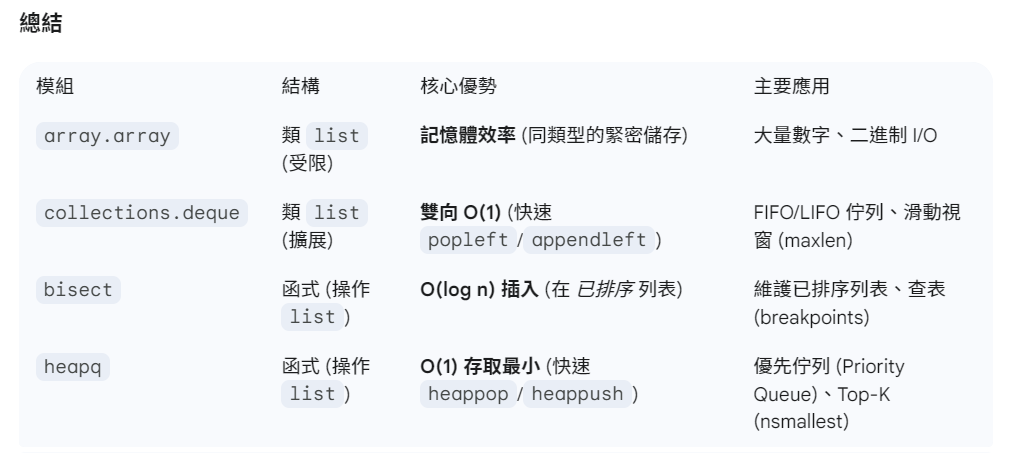

## 11.8. 十進制 (Decimal) 浮點數運算 (Decimal Floating Point Arithmetic)

PASS

...

總結：`Decimal` vs `float`

* 使用 `Decimal` 的時機：

    * 金融和貨幣計算（首選！）。

    * 需要精確控制小數位數和捨入規則的應用（例如法規、稅務）。

    * 需要重現手工十進制計算結果，不允許任何二進制誤差。

* 使用 `float` 的時機：

    * 科學計算、圖形學、機器學習 (ML)。

    * 速度比絕對精確度更重要。

    * 您處理的是本身就有誤差的「物理測量值」。